In [14]:
import os
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = 16, 6
rcParams.update({'font.size': 15})

from nideep.eval.learning_curve import LearningCurve
from nideep.eval.eval_utils import Phase

import nideep.eval.log_utils as lu
    
print("Done importing")

Done importing


## Plot learning curve

* read from log-files

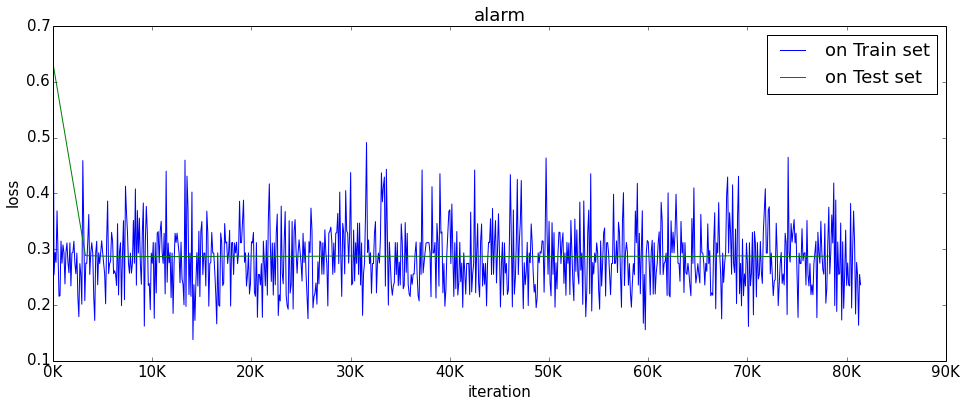

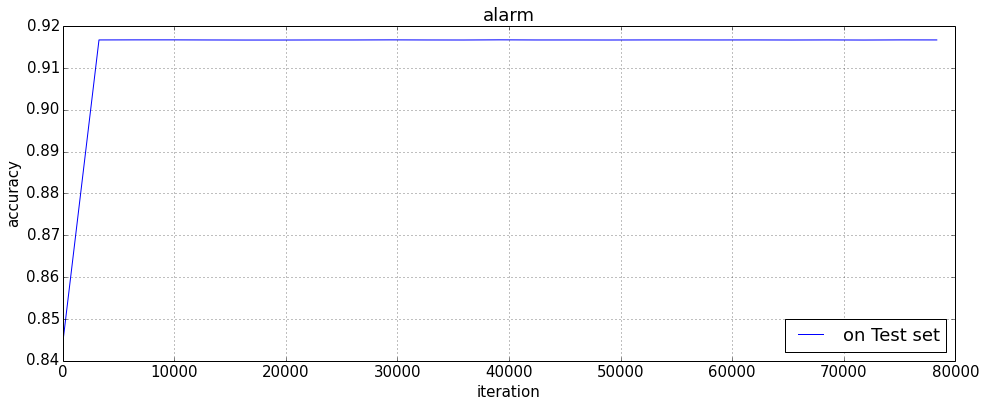

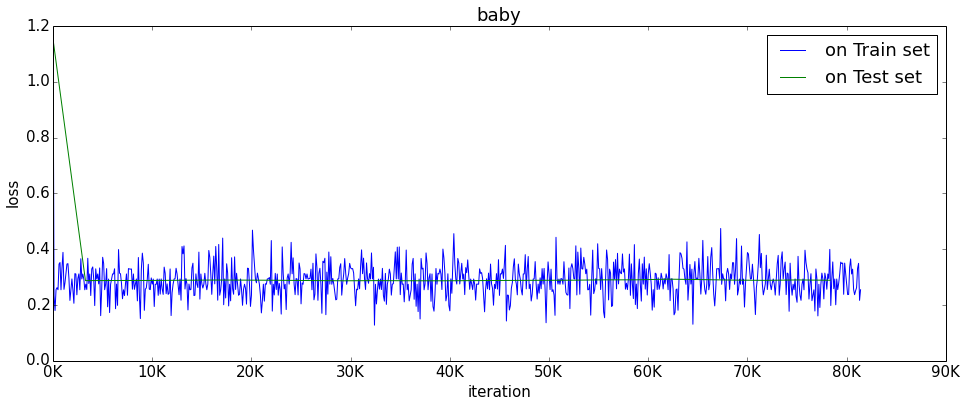

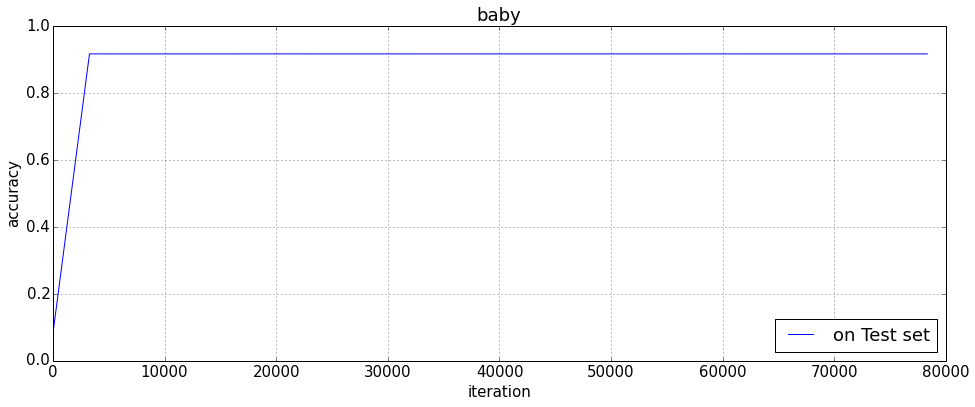

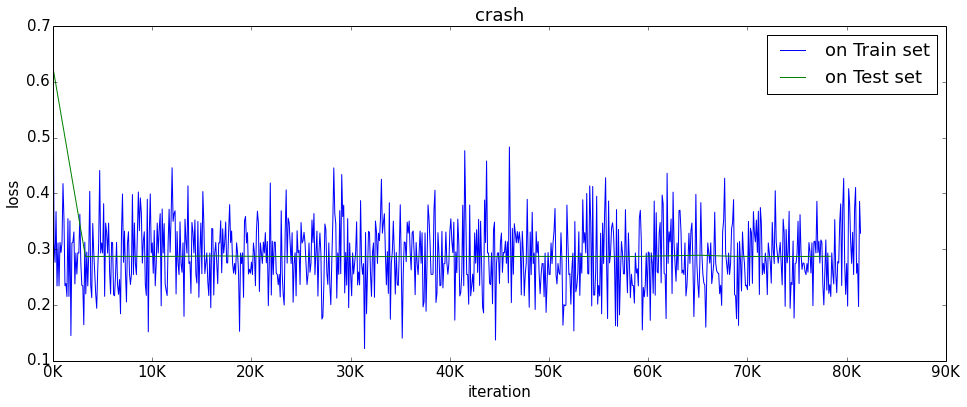

In [ ]:
root_path = '/mnt/antares_raid/home/cindy/sabik/experiments/14/'
# root_path = '/mnt/antares_raid/home/cindy/adhara/experiments/13/'
# root_path = '/mnt/antares_raid/home/cindy/merope/experiments/11/'
log_path = root_path+'caffe.INFO'

e = LearningCurve(log_path)
e.parse()

soundtypes=['alarm', 'baby', 'crash', 'dog', 'engine', 'femaleSpeech', 'fire',
       'footsteps', 'knock', 'phone', 'piano']

K = len(soundtypes)  #get number of class labels
# calculate average accuracy and loss
total_loss_test = e.list('loss01', Phase.TEST)
total_loss_train = e.list('loss01',Phase.TRAIN)
##TODO: currently just use the test accuracy
total_accuracy_test = e.list('acc01',Phase.TEST)
# total_accuracy_train = e.list('acc01',Phase.TRAIN)
for s in range(K):
    plt.figure()
    for phase in [Phase.TRAIN, Phase.TEST]:    
        num_iter = e.list('NumIters', phase)
        loss = e.list('loss'+str(s+1).zfill(2), phase)
        if s!=0:
            if phase==Phase.TRAIN:
                total_loss_train += loss
            else:
                total_loss_test += loss
 
        plt.plot(num_iter, loss, label='on %s set' % (phase,))
        plt.xlabel('iteration')
        # format x-axis ticks
        ticks, _ = plt.xticks()
    
        plt.xticks(ticks, ["%dK" % int(t/1000) for t in ticks])
        plt.ylabel('loss')
        #plt.title(e.name())
        plt.title(soundtypes[s])
        plt.legend()
        plt.savefig(root_path+'plots/loss'+str(s+1).zfill(2)+soundtypes[s]+'.png')
    plt.figure()
    num_iter = e.list('NumIters', Phase.TEST)
    acc = e.list('acc'+str(s+1).zfill(2), phase)
    if s!=0:
        if phase==Phase.TEST:
            total_accuracy_test += acc
    plt.plot(num_iter, acc, label='on %s set' % (phase,))

    plt.xlabel('iteration')
    plt.ylabel('accuracy')
    plt.title(soundtypes[s])
  
    plt.legend(loc='lower right')
    plt.grid()
    plt.savefig(root_path+'plots/accuracy'+str(s+1).zfill(2)+soundtypes[s]+'.png')
###########################################
## plot the average loss and accuracy    ##
###########################################
av_loss_test = total_loss_test/K
av_loss_train = total_loss_train/K
av_accuracy_test = total_accuracy_test/K
## average loss ##
plt.figure()
num_iter_test = e.list('NumIters', Phase.TEST)
num_iter_train = e.list('NumIters', Phase.TRAIN)
plt.plot(num_iter_train, av_loss_train, label='on %s set' % (Phase.TRAIN,))
plt.plot(num_iter_test, av_loss_test, label='on %s set' % (Phase.TEST,))
plt.xlabel('iteration')
# format x-axis ticks
ticks, _ = plt.xticks()
    
plt.xticks(ticks, ["%dK" % int(t/1000) for t in ticks])
plt.ylabel('loss')
plt.title('Average Loss')
plt.legend()
plt.savefig(root_path+'plots/AverageLoss.png')
## average accuracy ##
plt.figure()
plt.plot(num_iter_test, av_accuracy_test, label='on %s set' % (Phase.TEST,))
plt.xlabel('iteration')
# format x-axis ticks
ticks, _ = plt.xticks()
    
plt.xticks(ticks, ["%dK" % int(t/1000) for t in ticks])
plt.ylabel('accuracy')
plt.title('Average Accuracy')
plt.legend(loc='lower right')
plt.savefig(root_path+'plots/AverageAccuracy.png')
np.savetxt(root_path+'test_iternum.txt',num_iter_test,fmt='%10f')
np.savetxt(root_path+'train_iternum.txt',num_iter_train,fmt='%10f')
np.savetxt(root_path+'av_train_lossvalues.txt',av_loss_train,fmt='%10f')
np.savetxt(root_path+'av_test_lossvalues.txt',av_loss_test,fmt='%10f')
np.savetxt(root_path+'av_test_accuracyvalues.txt',av_accuracy_test,fmt='%10f')

In [22]:
root_path = '/mnt/antares_raid/home/cindy/adhara/experiments/08/'
log_path = root_path+'caffe.INFO'

e = LearningCurve(log_path)
e.parse()

soundtypes=['alarm', 'baby', 'crash', 'dog', 'engine', 'femaleSpeech', 'fire',
       'footsteps', 'knock', 'phone', 'piano']

for s in range(len(soundtypes)):
    plt.figure()
    for phase in [Phase.TRAIN, Phase.TEST]:    
        num_iter = e.list('NumIters', phase)
        loss = e.list('loss'+str(s+1).zfill(2), phase)
        plt.plot(num_iter, loss, label='on %s set' % (phase,))

        plt.xlabel('iteration')
        # format x-axis ticks
        ticks, _ = plt.xticks()
    
        plt.xticks(ticks, ["%dK" % int(t/1000) for t in ticks])
        plt.ylabel('loss')
        #plt.title(e.name())
        plt.title(soundtypes[s])
        plt.legend()
    plt.figure()
    num_iter = e.list('NumIters', phase)
    acc = e.list('acc'+str(s+1).zfill(2), phase)
    plt.plot(num_iter, acc, label='on %s set' % (phase,))

    plt.xlabel('iteration')
    plt.ylabel('accuracy')
    plt.title(soundtypes[s])
  
    plt.legend(loc='lower right')
    plt.grid()